In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AI/train.csv")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/AI/test.csv")

In [ ]:
train.columns

Index(['Label', 'Content'], dtype='object')

In [ ]:
test.columns

Index(['Label', 'Content'], dtype='object')

In [ ]:
train.isnull().sum()

Label      0
Content    0
dtype: int64

In [ ]:
test.isnull().sum()

Label      25337
Content        0
dtype: int64

In [ ]:
train.dtypes

Label       int64
Content    object
dtype: object

In [ ]:
train.head(3)

,Label,Content
0,2,second counting input 5 2 which receives inter...
1,4,extremely low temperature of the chips in cold...
2,3,of the basic ammonium salt of the carboxyl ate...


In [ ]:
! pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import re, unidecode
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
def remove_slash_with_space(text):
    return text.replace('\\', " ")
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
def text_lowercase(text):
    return text.lower()
def remove_whitespace(text):
    return  " ".join(text.split())
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)
def stem_words(text):
    stemmer = PorterStemmer()
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stems)
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)

    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return ' '.join(lemmas)

In [ ]:
# Perform preprocessing
def perform_preprocessing(text):
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_numbers(text)
    text = remove_stopwords(text)
    text = text_lowercase(text)
    text = remove_slash_with_space(text)
    text = remove_punctuation(text)
    text = stem_words(text)
    text = lemmatize_words(text)
    text = remove_whitespace(text)
    return text

In [ ]:
train["Content"] = train["Content"].apply(perform_preprocessing)

In [ ]:
test["Content"] = test["Content"].apply(perform_preprocessing)

In [ ]:
import string
import re
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
train['Content'] = train['Content'].apply(lambda x: clean_text(x))

In [ ]:
test['Content'] = test['Content'].apply(lambda x: clean_text(x))

In [ ]:
from textblob import TextBlob, Word, Blobber
from nltk.stem import PorterStemmer
st = PorterStemmer()

array([[<Axes: title={'center': 'Label'}>]], dtype=object)

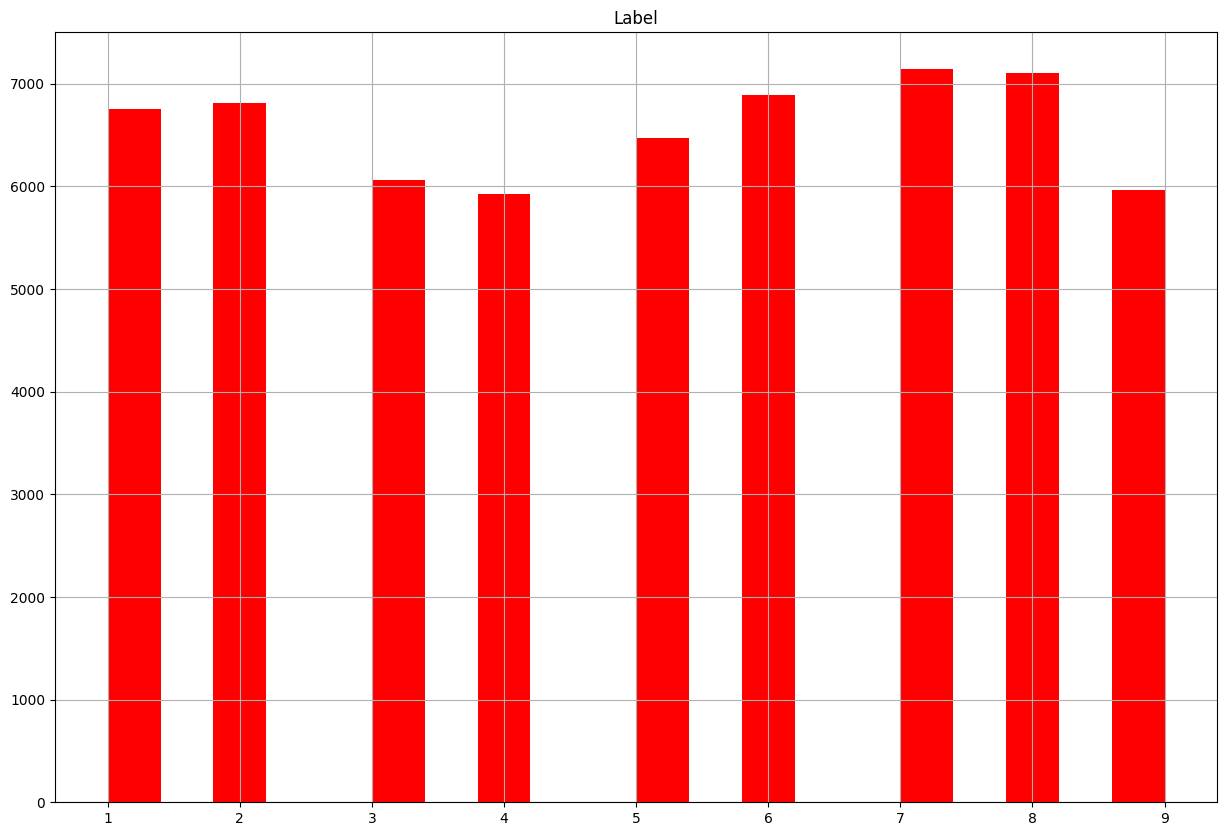

In [ ]:
train[['Label']].hist(bins=20, figsize=(15, 10), color='red')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
print(train.columns)
print(test.columns)

Index(['Label', 'Content'], dtype='object')
Index(['Label', 'Content'], dtype='object')


In [ ]:
train["Label"]=train["Label"]-1

In [ ]:
train.head()

,Label,Content
0,1,second count input receiv intern control devic...
1,3,extrem low temperatur chip cold season chip li...
2,2,basic ammonium salt carboxyl eat water solubl ...
3,8,u provid axial support crankshaft via radial i...
4,1,uc inner surfac ud mean surfac layer away oute...


In [ ]:
train.to_csv('data_train.csv', index=False)  # Set index=False to avoid saving the index column
test.to_csv('data_test.csv', index=False)  # Set index=False to avoid saving the index column